#### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

#### Load dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Preprocessing

#### Check for missing values

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There exist no missing value 

In [7]:
data = data.drop('CustomerID', axis=1)

## EDA

### Univariate Analysis

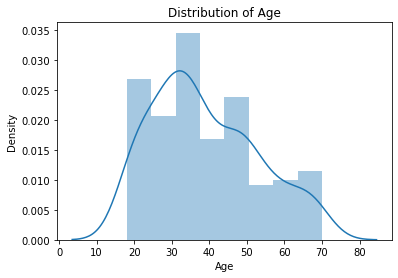

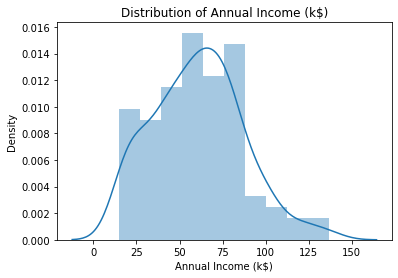

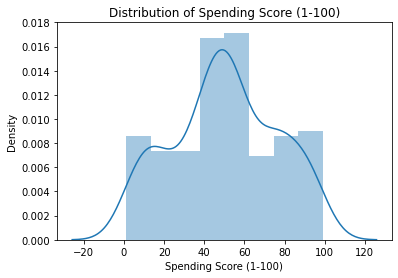

In [8]:
columns = data.select_dtypes(include=['int64']).columns.to_list()

for i in columns:
    plt.figure()
    plt.title('Distribution of {}'.format(i))
    sns.distplot(data[i])


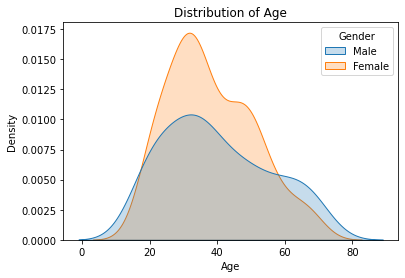

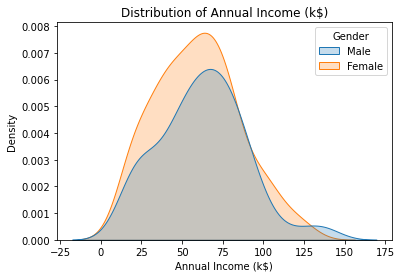

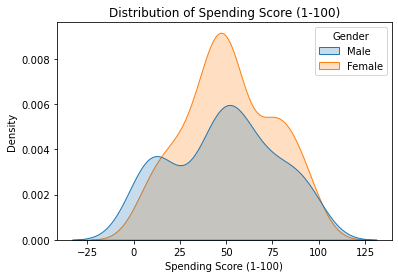

In [9]:
for i in columns:
    plt.figure()
    plt.title('Distribution of {}'.format(i))
    sns.kdeplot(x=i, hue='Gender',data=data, shade=True)

### Bivariate Analysis

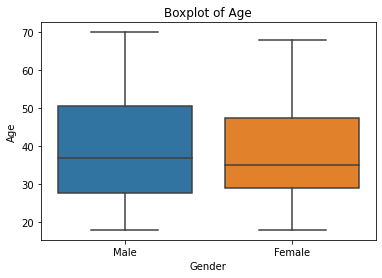

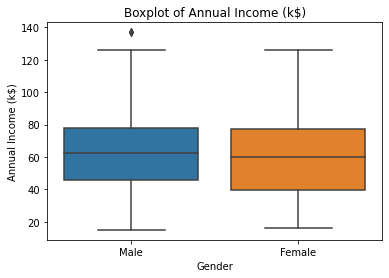

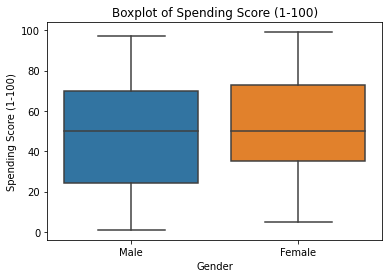

In [23]:
for i in columns:
    plt.figure()
    plt.title('Boxplot of {}'.format(i))
    sns.boxplot(y=data[i], x='Gender', data=data)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

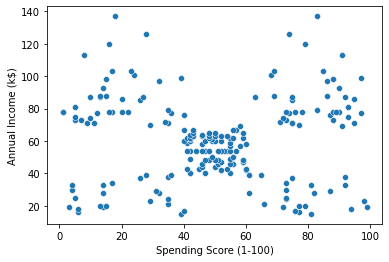

In [14]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=data)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

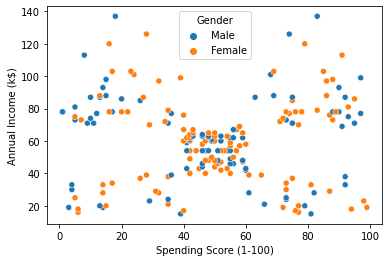

In [15]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=data, hue='Gender')

### **Annual Income and Spending Score**

#### Extract independent features

In [47]:
X = data.iloc[:,[2,3]].values

#### Find optimal clusters using the elbow method

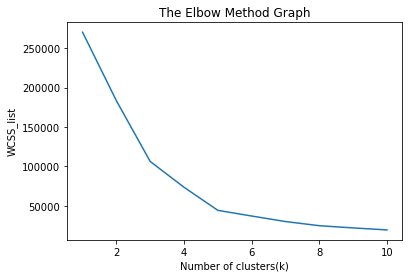

In [48]:
wcss_list = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS_list')
plt.show()

The elbow point is at 5 and therefore we'll have 5 clusters

#### Training the Algorithm

In [49]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X)
y_predict = kmeans.predict(X)

In [50]:
data['Clusters'] = y_predict
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4
5,Female,22,17,76,1
6,Female,35,18,6,4
7,Female,23,18,94,1
8,Male,64,19,3,4
9,Female,30,19,72,1


#### Visualizing Clusters

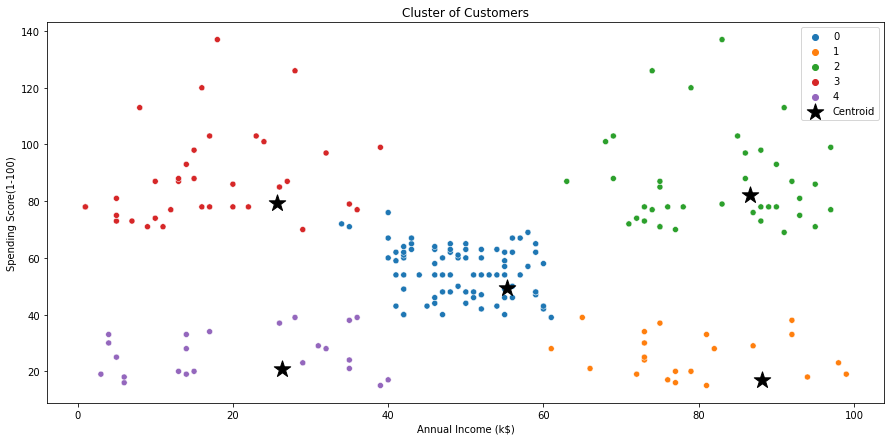

In [52]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)',data=data, hue='Clusters', palette='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', label='Centroid', marker='*')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.gcf().set_size_inches(15,7)
plt.legend()
plt.show()

#### Interpretation

**Cluster 1** - customers with low income and low spending habits which can be categorized as **sensible**.

**Cluster 2** - customers with average income and average spending habits which can be categorized as **sensible**.

**Cluster 3** - customers with low income and high spending habits which can be categorized as **careless**.

**Cluster 4** - customers with high income and high spending habits which can be categorized as **target**, most profitable to the mall owner.

**Cluster 5** - customers with high income and low spending habits which can be categorized as **careful**.




### **Age and Spending Score**

In [71]:
data1 = data.filter(['Age','Spending Score (1-100)'])
X1 = data1.values

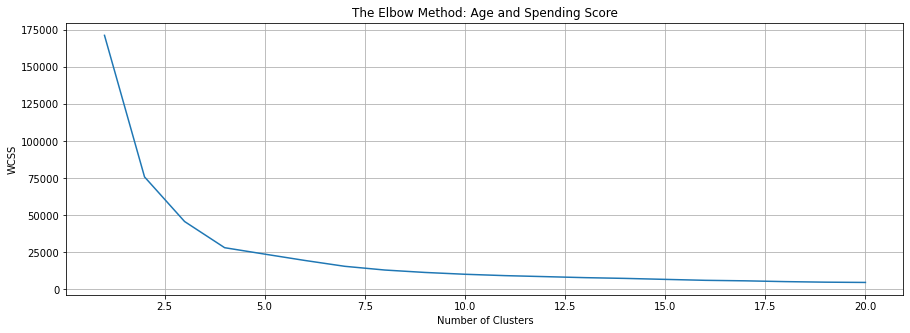

In [72]:
wcss = [] 

#We are going to build clutering models for k = 1 to 20
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1,21), wcss)

plt.title('The Elbow Method: Age and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.gcf().set_size_inches(15,5)
plt.grid()
plt.show()

In [73]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++')
y_pred1 = kmeans2.fit_predict(X1)

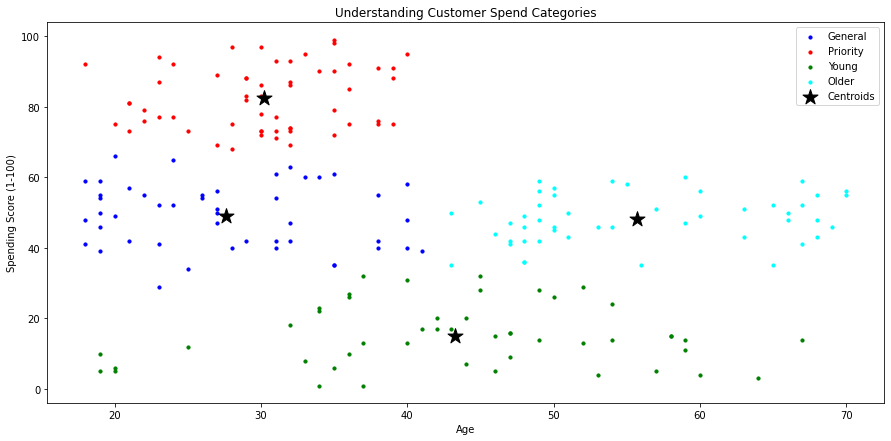

In [74]:
plt.scatter(X1[y_pred1 == 0, 0], X1[y_pred1 == 0, 1], s = 10,  color='blue', label = 'General')
plt.scatter(X1[y_pred1 == 1, 0], X1[y_pred1 == 1, 1], s = 10,  color='red', label = 'Priority')
plt.scatter(X1[y_pred1 == 2, 0], X1[y_pred1 == 2, 1], s = 10, color='green', label = 'Young')
plt.scatter(X1[y_pred1 == 3, 0], X1[y_pred1 == 3, 1], s = 10,  color='cyan', label = 'Older')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], marker="*", s = 250, c = 'black', label = 'Centroids')
plt.title('Understanding Customer Spend Categories',fontsize=12)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.gcf().set_size_inches(15,7)
plt.legend()
plt.show()

> **Business Insight:** We identify 4 clusters/segments of customers in the mall when we analyze it based on the customers age and spending score. Based on the clusters we see here, here are 2 areas of opportunities
1. **General** - There is a general population of people who regardless of age have a low spending score with your mall. Marketing strategies can be built for this group to be age-agnostic.
2. **Older** - We have a cluster of older population with a mid-level spending score with your mall. On average, this population tends to have/had a higher annual income than the younger population and would be great targets for marketing campaigns. You need to ensure that your company is inclusive of the older population and targets ads towards them to increase their spend score.

This visual was easy to analyze and we could draw insights with general knowledge and some basic knowledge of our customers.

### **Age, Annual Income and Spending Score**

In [79]:
#Let us consider x = Age and y = Annual Income and z = Spending Score as the coordinates for clustering
#This is in column 2, 3, 4 of the dataset, we will access it with the index
X2 = data.iloc[:, [1, 2, 3]].values
X2[:2]


array([[19, 15, 39],
       [21, 15, 81]], dtype=int64)

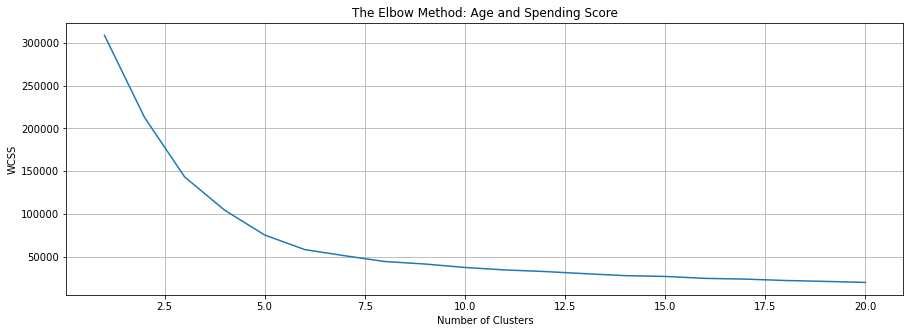

In [80]:
wcss3 = [] 

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X2)
    wcss3.append(kmeans.inertia_) 
plt.plot(range(1,21), wcss3)

plt.title('The Elbow Method: Age and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.gcf().set_size_inches(15,5)
plt.grid()
plt.show()

In [81]:
kmeans3 = KMeans(n_clusters = 6, init = 'k-means++')
ypred = kmeans3.fit_predict(X2)

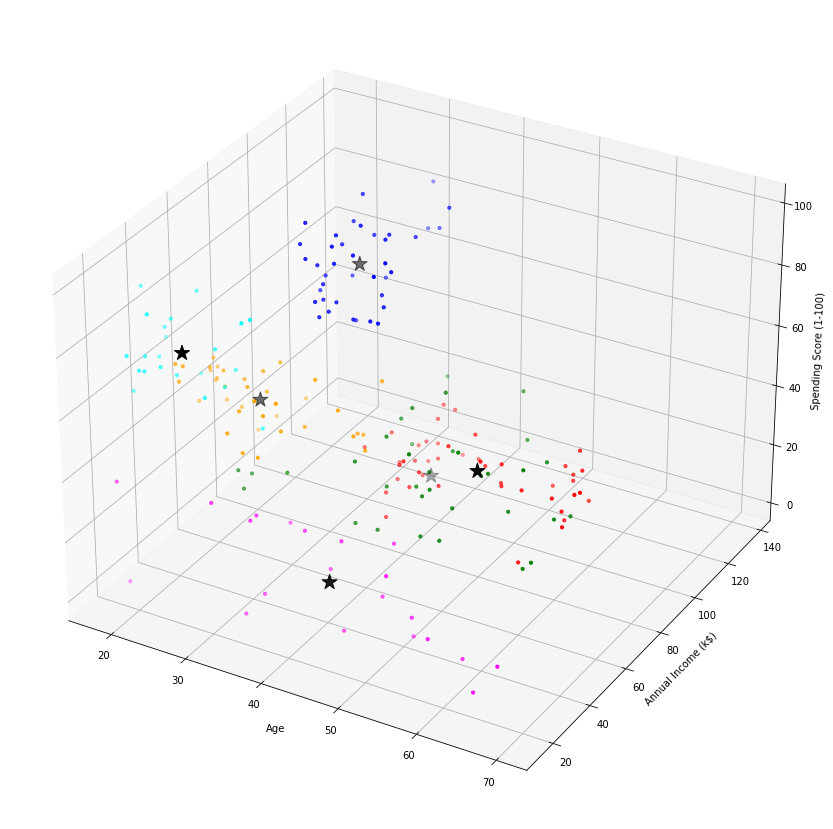

In [82]:
ax = plt.axes(projection='3d')
plt.gcf().set_size_inches(15,15)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

color = ['blue','red','green','cyan','magenta','orange']

ax.scatter3D(X2[ypred == 0, 0], X2[ypred == 0, 1], X2[ypred == 0, 2], c = color[0], s = 10);
ax.scatter3D(X2[ypred == 1, 0], X2[ypred == 1, 1], X2[ypred == 1, 2], c = color[1], s = 10);
ax.scatter3D(X2[ypred == 2, 0], X2[ypred == 2, 1], X2[ypred == 2, 2], c = color[2], s = 10);
ax.scatter3D(X2[ypred == 3, 0], X2[ypred == 3, 1], X2[ypred == 3, 2], c = color[3], s = 10);
ax.scatter3D(X2[ypred == 4, 0], X2[ypred == 4, 1], X2[ypred == 4, 2], c = color[4], s = 10);
ax.scatter3D(X2[ypred == 5, 0], X2[ypred == 5, 1], X2[ypred == 5, 2], c = color[5], s = 10);

ax.scatter3D(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], marker="*", s = 250, c = 'black', label = 'Centroid')
plt.show()